In [7]:
# Tahap Requirements Analysis (Analisis Kebutuhan)
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [12]:
import csv
import random

# Tahap Data Preparation (Persiapan Data)
# Read the CSV file
with open('C:/Users/fathi/OneDrive/Documents/Penulisan Ilmiah/Program/data/data_alphanorm.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Separate header row and data rows
header_row = rows[0]
data_rows = rows[1:]

# Shuffle the data rows
random.shuffle(data_rows)

# Combine header row and shuffled data rows
shuffled_rows = [header_row] + data_rows

# Write the shuffled rows to a new CSV file
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(shuffled_rows)

print("Rows (excluding the header) shuffled and saved to 'data.csv'.")

Rows (excluding the header) shuffled and saved to 'data.csv'.


In [13]:
df = pd.read_csv('data.csv')
df.head()

,sex,hb,hct,mcv,mch,mchc,rdw,rbc,phenotype
0,female,10.6,34.0,72.0,23.0,31.0,15.0,4.72,alpha carrier
1,female,12.9,41.0,86.0,27.0,31.0,13.9,4.81,normal
2,male,11.5,34.0,87.0,30.0,34.0,12.7,3.89,normal
3,male,14.7,45.0,87.0,29.0,33.0,12.4,5.11,normal
4,female,12.6,38.3,80.0,26.5,33.0,12.6,4.76,alpha carrier


In [14]:
# Tahap Data Preprocessing (Praproses Data)
# Checking for null values
df.isnull().sum()

sex          0
hb           1
hct          0
mcv          0
mch          0
mchc         0
rdw          0
rbc          0
phenotype    0
dtype: int64

In [16]:
df['hb'] = df['hb'].fillna(df['hb'].mode()[0])

In [17]:
# Checking for null values
df.isnull().sum()

sex          0
hb           0
hct          0
mcv          0
mch          0
mchc         0
rdw          0
rbc          0
phenotype    0
dtype: int64

In [70]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['sex','phenotype']

# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

In [71]:
df.head()

,sex,hb,hct,mcv,mch,mchc,rdw,rbc,phenotype
0,1,12.5,40.0,65.0,21.0,32.0,17.1,6.10,0
1,0,12.1,38.0,66.7,21.2,31.8,16.4,5.70,0
2,0,12.7,38.0,87.0,29.0,34.0,13.1,4.32,1
3,0,10.5,31.6,70.1,23.3,33.2,16.9,4.51,0
4,1,14.6,46.6,67.0,21.0,31.3,18.4,6.96,0


In [72]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Get the label column
label_column = df.iloc[:, -1]

# Normalize all columns except the last column
df_normalized = df.iloc[:, :-1].copy()

In [73]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])

# Add the label column back to the normalized dataframe
df_normalized = pd.concat([df_normalized, label_column], axis=1)

In [74]:
df_normalized.head()

,sex,hb,hct,mcv,mch,mchc,rdw,rbc,phenotype
0,1.0,0.423913,0.484127,0.270833,0.277778,0.089636,0.401316,0.152249,0
1,0.0,0.380435,0.404762,0.306250,0.288889,0.084034,0.355263,0.129181,0
2,0.0,0.445652,0.404762,0.729167,0.722222,0.145658,0.138158,0.049596,1
3,0.0,0.206522,0.150794,0.377083,0.405556,0.123249,0.388158,0.060554,0
4,1.0,0.652174,0.746032,0.312500,0.277778,0.070028,0.486842,0.201845,0


In [75]:
y = df['phenotype']
x = df.iloc[:,:-1]
x.shape

(594, 8)

In [76]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [77]:
x_test.shape

(119, 8)

In [78]:
# Tahap Model Building (Pembangunan Model)
# Apply SVM Model
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier=svm.SVC(kernel = 'linear', gamma ='auto', C=2) 
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.874


<AxesSubplot:>

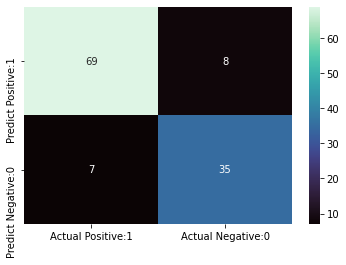

In [79]:
# Tahap Model Testing (Pengujian Model)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [80]:
# Tahap Hyperparameter Tuning (Pemilihan Hiperparameter)
param_grid = {
    'C': [0.1, 1, 2, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [81]:
from sklearn.model_selection import GridSearchCV
classifier = svm.SVC()
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [82]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [83]:
y_pred = best_model.predict(x_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8739495798319328
